## Observations and Insights 

1. There were 249 individual mice used in the testing for drug effectieness on tumors, with the genders split relatively equally between male and female subjects. In total 1888 measurements were taken (duplicate data for g989 was identified and removed).

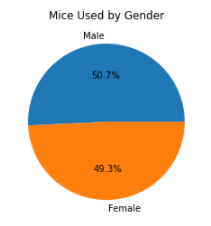

2. Out of the drugs Capomulin, Ramakin, Ceftamin and Infubinol. Capomuline appears to demonstrate some effectiveness in reducing tumor sizes at the completion of the drug regment. 

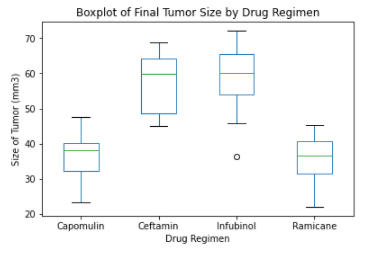
 
3. For the drug Capmulin a strong positive correlation (r=0.84) was observed between the average weight of the mice subjects and size of the tumors. p-value coefficeint of 1.3225722434712642 indicates it may not be signifcant.

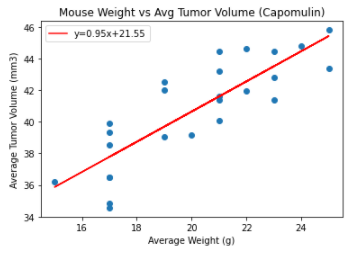

Note: Observations and insights have yet to take into account mice that did not complete the total drug regimen, which may provide further insight in terms of the drug effectiveness. Further exploration in relation to the age of the mice subjects would be useful as well. A significantly increased sample size for each drug regimen would also be recommended for a more statistically valid analysis. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#renamed dataset for easier reference
mouse = mouse_metadata
results = study_results

# Combine the data into a single dataset
combined = pd.merge(mouse,results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(combined["Mouse ID"].value_counts().count())

#total rows of data
print(combined["Mouse ID"].count())

249
1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined[combined.duplicated(["Mouse ID","Timepoint"])]

duplicate.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined[combined.duplicated(["Mouse ID","Timepoint"])]
duplicate.head

<bound method NDFrame.head of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  >

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined.drop_duplicates(["Mouse ID", "Timepoint"])
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combined["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_combined.groupby("Drug Regimen")
tumourmean = regimen_grouped["Tumor Volume (mm3)"].mean()
tumourmedian = regimen_grouped["Tumor Volume (mm3)"].median()
tumourvar = regimen_grouped["Tumor Volume (mm3)"].var()
tumourstd = regimen_grouped["Tumor Volume (mm3)"].std()
tumourSEM = regimen_grouped["Tumor Volume (mm3)"].sem()
mice_used = regimen_grouped["Mouse ID"].count()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({
    "Mice Used": mice_used,
    "Mean Turmour Size":tumourmean,
    "Median Tumour Size": tumourmedian,
    "Variance Tumour Size": tumourvar,
    "Std Deviation Tumour Size": tumourstd,
    "SEM Tumour Size": tumourSEM
})
summary_stats.head(100)
# This method produces everything in a single groupby function


,Mice Used,Mean Turmour Size,Median Tumour Size,Variance Tumour Size,Std Deviation Tumour Size,SEM Tumour Size
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Used per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice Used'>

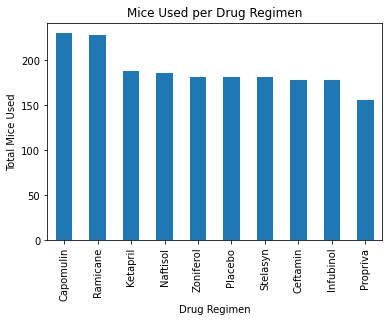

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_grouped = clean_combined.groupby(["Drug Regimen"])['Mouse ID'].count()
mice_grouped.sort_values(ascending=False).plot(kind='bar', title="Mice Used per Drug Regimen", ylabel='Total Mice Used', xlabel='Drug Regimen')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

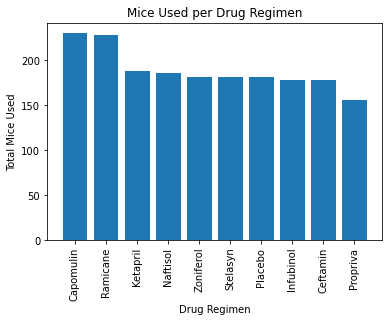

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Count number of drugs regimes used
count_regimen = clean_combined["Drug Regimen"].value_counts()

# Set the x_axis
x_axis = np.arange(len(count_regimen))

plt.bar(x_axis, count_regimen)
plt.title("Mice Used per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice Used")

#label the x-axis data with names based on the index of the data
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_regimen.index.values)

#rotate label on x_axis
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Mice Used by Gender'>

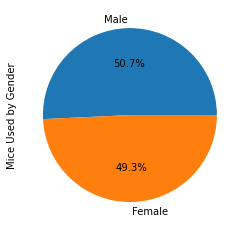

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_grouped = clean_combined.groupby(["Sex"])['Mouse ID'].count()
mice_grouped.sort_values(ascending=False).plot(kind='pie', ylabel="Mice Used by Gender", autopct="%1.1f%%")

Text(0.5, 1.0, 'Mice Used by Gender')

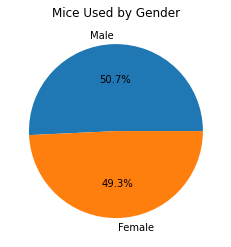

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count number of for gender regimes used
count_gender = clean_combined["Sex"].value_counts()
labels = clean_combined["Sex"].unique()

plt.pie(count_gender,  labels=labels, autopct="%1.1f%%")
plt.title("Mice Used by Gender")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_combined.loc[clean_combined["Drug Regimen"] == "Capomulin"]
ramicane = clean_combined.loc[clean_combined["Drug Regimen"] == "Ramicane"]
infubinol = clean_combined.loc[clean_combined["Drug Regimen"] == "Infubinol"]
ceftamin = clean_combined.loc[clean_combined["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_group = capomulin.groupby(["Mouse ID"])["Timepoint"].max()
ramicane_group = ramicane.groupby(["Mouse ID"])["Timepoint"].max()
infubinol_group = infubinol.groupby(["Mouse ID"])["Timepoint"].max()
ceftamin_group = ceftamin.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_combined = pd.merge(capomulin, capomulin_group, on=("Mouse ID", "Timepoint"), how='right')
ramicane_combined = pd.merge(ramicane, ramicane_group, on=("Mouse ID", "Timepoint"), how='right')
infubinol_combined = pd.merge(infubinol, infubinol_group, on=("Mouse ID", "Timepoint"), how='right')
ceftamin_combined = pd.merge(ceftamin, ceftamin_group, on=("Mouse ID", "Timepoint"), how='right')

combine_list = [capomulin_combined, ramicane_combined, infubinol_combined, ceftamin_combined]

combine_all_DF = pd.DataFrame()

for df in combine_list:
    combine_all_DF = combine_all_DF.append(combine_list)

#len(combine_all_DF) - use this to check number of rows for data combining check (400 rows)

combine_all_DF = combine_all_DF.drop_duplicates()

#combine_all_DF.to_csv('check_list.csv') - used to check on data in excel. confirmed 400 rows.
#inserted drop_duplicate to remove double ups.

combine_all_DF



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,Ceftamin,Male,23,28,0,45.000000,0
21,x581,Ceftamin,Female,19,28,45,64.634949,3
22,x822,Ceftamin,Male,3,29,45,61.386660,3
23,y769,Ceftamin,Female,6,27,45,68.594745,4


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Reference for help: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
#Reference for upper and lower bounds: https://www.hackmath.net/en/calculator/lower-and-upper-fence

cap_IQR = capomulin_combined[["Tumor Volume (mm3)"]].quantile(q=[.25,.5,.75], axis = 0, numeric_only=True, interpolation='linear')
cap_q1 = cap_IQR["Tumor Volume (mm3)"].min()
cap_q3 = cap_IQR["Tumor Volume (mm3)"].max()
cap_upper = cap_q3 + (1.5*cap_IQrange)
cap_lower = cap_q1 - (1.5*cap_IQrange)
cap_IQrange = cap_q3-cap_q1
cap_median = capomulin_combined["Tumor Volume (mm3)"].median()
cap_max = capomulin_combined["Tumor Volume (mm3)"].max()
cap_min = capomulin_combined["Tumor Volume (mm3)"].max()

ram_IQR = ramicane_combined[["Tumor Volume (mm3)"]].quantile(q=[.25,.5,.75], axis = 0, numeric_only=True, interpolation='linear')
ram_q1 = ram_IQR["Tumor Volume (mm3)"].min()
ram_q3 = ram_IQR["Tumor Volume (mm3)"].max()
ram_upper = ram_q3 + (1.5*ram_IQrange)
ram_lower = ram_q1 - (1.5*ram_IQrange)
ram_IQrange = ram_q3-ram_q1
ram_median = ramicane_combined["Tumor Volume (mm3)"].median()
ram_max = ramicane_combined["Tumor Volume (mm3)"].max()
ram_min = ramicane_combined["Tumor Volume (mm3)"].min()

inf_IQR = infubinol_combined[["Tumor Volume (mm3)"]].quantile(q=[.25,.5,.75], axis = 0, numeric_only=True, interpolation='linear')    
inf_q1 = inf_IQR["Tumor Volume (mm3)"].min()
inf_q3 = inf_IQR["Tumor Volume (mm3)"].max()
inf_upper = inf_q3 + (1.5*inf_IQrange)
inf_lower = inf_q1 - (1.5*inf_IQrange)
inf_IQrange = inf_q3-inf_q1
inf_median = infubinol_combined["Tumor Volume (mm3)"].median()
inf_max = infubinol_combined["Tumor Volume (mm3)"].max()
inf_min = infubinol_combined["Tumor Volume (mm3)"].min()

cef_IQR = ceftamin_combined[["Tumor Volume (mm3)"]].quantile(q=[.25,.5,.75], axis = 0, numeric_only=True, interpolation='linear')
cef_q1 = cef_IQR["Tumor Volume (mm3)"].min()
cef_q3 = cef_IQR["Tumor Volume (mm3)"].max()
cef_upper = cef_q3 + (1.5*cef_IQrange)
cef_lower = cef_q1 - (1.5*cef_IQrange)
cef_IQrange = cef_q3-cef_q1
cef_median = ceftamin_combined["Tumor Volume (mm3)"].median()
cef_max = ceftamin_combined["Tumor Volume (mm3)"].max()
cef_min = ceftamin_combined["Tumor Volume (mm3)"].min()


#combine all drug data into a single dataframe:

cap_stats = pd.DataFrame({
    "Q1 Tumor Size": [cap_q1],
    "Q3 Tumor Size":[cap_q3],
    "IQR Range": [cap_IQrange],
    "Lower Bound" : [cap_lower],
    "Upper Bound" :[cap_upper],
    "Median Tumor Size": [cap_median],
    "Minimum Tumor Size": [cap_min],
    "Maximum Tumor Size": [cap_max]},  
    index=["Capomulin"])

ram_stats = pd.DataFrame({
    "Q1 Tumor Size": [ram_q1],
    "Q3 Tumor Size":[ram_q3],
    "IQR Range": [ram_IQrange],
    "Lower Bound" : [ram_lower],
    "Upper Bound" :[ram_upper],    
    "Median Tumor Size": [ram_median],
    "Minimum Tumor Size": [ram_min],
    "Maximum Tumor Size": [ram_max]},
    index=["Ramicane"])

inf_stats = pd.DataFrame({
    "Q1 Tumor Size": [inf_q1],
    "Q3 Tumor Size":[inf_q3],
    "IQR Range": [inf_IQrange],
    "Lower Bound" : [inf_lower],
    "Upper Bound" :[inf_upper],  
    "Median Tumor Size": [inf_median],
    "Minimum Tumor Size": [inf_min],
    "Maximum Tumor Size": [inf_max]},
    index=["Infubinol"])

cef_stats = pd.DataFrame({
    "Q1 Tumor Size": [cef_q1],
    "Q3 Tumor Size":[cef_q3],
    "IQR Range": [cef_IQrange],
    "Lower Bound" : [cef_lower],
    "Upper Bound" :[cef_upper],
    "Median Tumor Size": [cef_median],
    "Minimum Tumor Size": [cef_min],
    "Maximum Tumor Size": [cef_max]},
    index=["Ceftamin"])

append1 = cap_stats.append(ram_stats)
append2 = inf_stats.append(append1)
append_all = cef_stats.append(append2)
# Locate the rows which contain mice on each drug and get the tumor volumes
   
# Determine outliers using upper and lower bounds
append_all.sort_index()

,Q1 Tumor Size,Q3 Tumor Size,IQR Range,Lower Bound,Upper Bound,Median Tumor Size,Minimum Tumor Size,Maximum Tumor Size
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,38.125164,47.685963,47.685963
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,59.851956,45.000000,68.923185
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,60.165180,36.321346,72.226731
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,36.561652,22.050126,45.220869


In [68]:
print((infubinol["Tumor Volume (mm3)"]<36.832905).sum())
print(f"An outlier was observed from table for Infubinol where a minimum tumor size of 36.321345g fell outside of the lower bound")

1
An outlier was observed from table for Infubinol where a minimum tumor size of 36.321345g fell outside of the lower bound


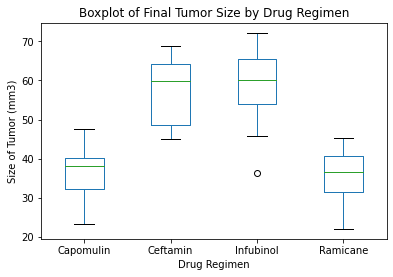

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combine_all_DF.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", grid = False)

#reference used to help with this plot: Shttps://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
plt.suptitle('') #removes the subtitle and cleans up the presentation
plt.title("Boxplot of Final Tumor Size by Drug Regimen")
plt.ylabel("Size of Tumor (mm3)")
plt.savefig("Box and Whiskers")

## Line and Scatter Plots

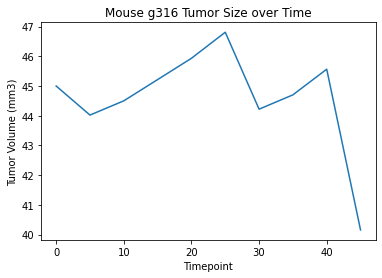

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#mouse chosen randomly from previous dataframes generated.
plot_mouse = clean_combined.loc[clean_combined["Mouse ID"] == "g316"]

plt.plot(plot_mouse["Timepoint"], plot_mouse["Tumor Volume (mm3)"])
plt.title("Mouse g316 Tumor Size over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("g316 Line Graph")

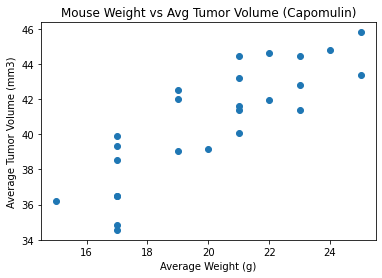

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#use previoulsy created capomulin DF

capomulin.head()
#used group by to get the average weight and tumor volume
cap_avgweight = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avgweight["Weight (g)"], cap_avgweight["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Avg Tumor Volume (Capomulin)")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Capomulin Scatter")

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(cap_avgweight["Weight (g)"], cap_avgweight["Tumor Volume (mm3)"])[0],2)
print(correlation)

0.84


In [52]:
#for the regression line
regression_line = st.linregress(cap_avgweight["Weight (g)"], cap_avgweight["Tumor Volume (mm3)"])
regression_line

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

In [58]:
slope = 0.9544396890241045
intercept = 21.552160532685015

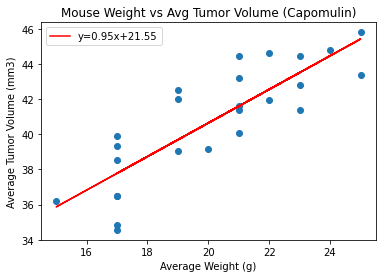

In [62]:
#create the line using the linregression from before
line = slope*(cap_avgweight["Weight (g)"]) + intercept

#grab the scatter plot from the previous exercise
#for future reference plotting: https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f
#https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas

plt.scatter(cap_avgweight["Weight (g)"], cap_avgweight["Tumor Volume (mm3)"])
plt.plot(cap_avgweight['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Mouse Weight vs Avg Tumor Volume (Capomulin)")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.savefig("Linear Regression")
